In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('df_modif.csv', encoding='latin-1', sep=',')

In [3]:
df = pd.DataFrame(data)

In [4]:
media = df['RU'].mean()

# Rellena los NaN con la media
df['RU'].fillna(media, inplace=True)

In [5]:
df.isnull().sum()

estacion    0
Datetime    0
DV          0
HR          0
P           0
PB          0
RS          0
RU          0
TEMP        0
VV          0
BEN         0
CH4         0
CO          0
EBE         0
NMHC        0
NO          0
NO2         0
NOX         0
O3          0
PM10        0
PM25        0
SO2         0
TCH         0
TOL         0
dtype: int64

## NORMALIZAR

In [6]:
# quitamos la variable del tipo object (string)
variables = df.drop(["Datetime"], axis=1, inplace=False)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
df_transformed = scaler.fit_transform(variables._get_numeric_data())

## SELECCION CARACTERÍSTICAS

In [12]:
from sklearn.decomposition import PCA
import numpy as np

In [29]:
# Crear una instancia de PCA con el número de componentes principales deseado
n_componentes = 2 # Número de componentes principales a retener
pca = PCA(n_components=n_componentes)

# Ajustar el modelo PCA a tus datos
pca.fit(X)

# Transformar tus datos al nuevo espacio de características
X_pca = pca.transform(X)

# Los componentes principales se encuentran en pca.components_
componentes_principales = pca.components_

# Las proporciones de varianza explicada por cada componente se encuentran en pca.explained_variance_ratio_
prop_varianza_explicada = pca.explained_variance_ratio_

# Imprimir los resultados
print("Datos originales (shape):", X.shape)
print("Datos transformados por PCA (shape):", X_pca.shape)
print("Componentes principales:\n", componentes_principales)
print("Proporciones de varianza explicada por cada componente:", prop_varianza_explicada)

Datos originales (shape): (21187, 8)
Datos transformados por PCA (shape): (21187, 2)
Componentes principales:
 [[ 1.68357312e-01  1.50915478e-01  8.96680040e-03  5.48735667e-03
  -9.72309291e-01 -3.58167917e-03 -5.80655153e-02 -1.74850009e-04]
 [ 9.85404532e-01 -1.40524162e-02 -1.06135733e-03 -1.83684848e-02
   1.67773921e-01  1.45939154e-02  8.40512366e-03  3.19265914e-03]]
Proporciones de varianza explicada por cada componente: [0.59074032 0.39810553]


- Diagrama de dispersión de los dos componentes

In [18]:
import matplotlib.pyplot as plt

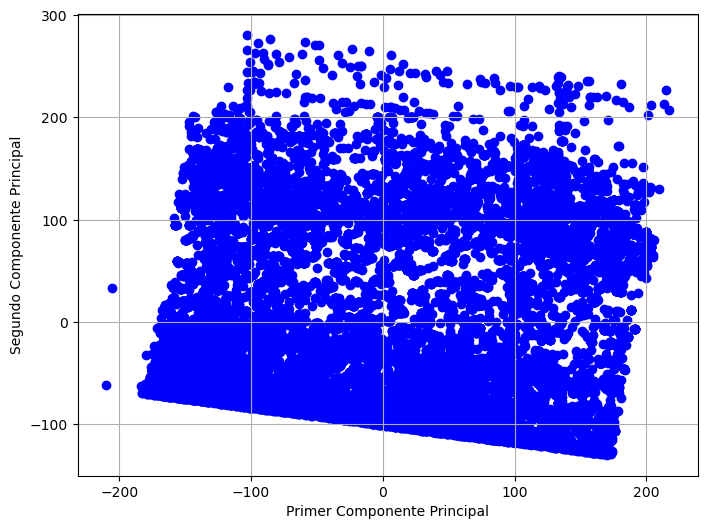

In [32]:
# Supongamos que tienes tus datos transformados por PCA en X_pca
# X_pca debe tener dos columnas, una para el primer componente principal y otra para el segundo componente principal

# Crear un diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o', label='Datos')

# Puedes agregar etiquetas a los ejes
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')

# Puedes agregar leyendas si tienes categorías o etiquetas
# plt.legend()

# Mostrar el gráfico
plt.grid()
plt.show()

- Visualización de Cargas de Variables

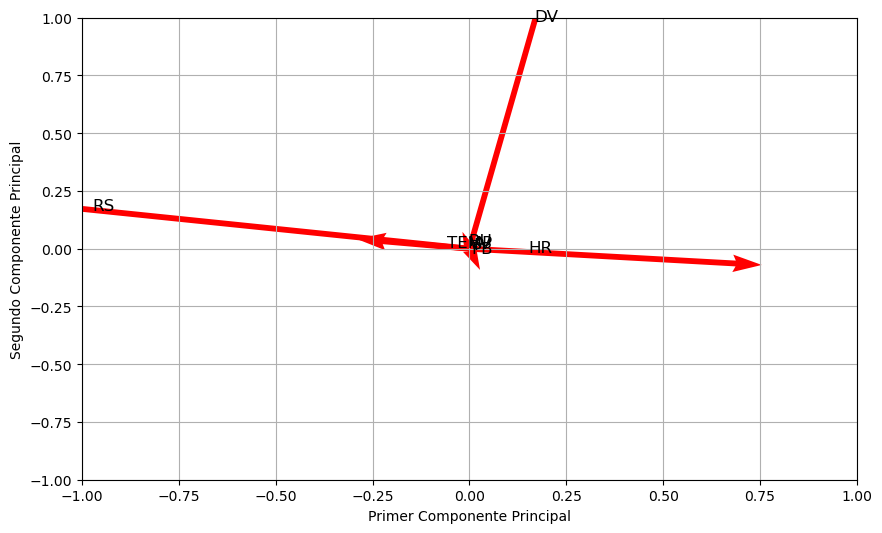

In [28]:
# Obtén las cargas de variables en los dos primeros componentes principales
loadings = pca.components_[:2, :]

# Supongamos que tienes una lista de nombres de variables originales
nombres_variables = ['DV', 'HR', 'P', 'PB', 'RS', 'RU', 'TEMP', 'VV']  # Sustituye con tus nombres de variables

# Crea un gráfico de vectores de carga
plt.figure(figsize=(10, 6))
plt.quiver(np.zeros(loadings.shape[1]), np.zeros(loadings.shape[1]), loadings[0, :], loadings[1, :], angles='xy', scale_units='xy', scale=0.2, color='r')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Etiqueta los vectores con los nombres de las variables originales
for i, nombre_variable in enumerate(nombres_variables):
    plt.text(loadings[0, i], loadings[1, i], nombre_variable, fontsize=12)

# Configura los ejes y muestra el gráfico
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.grid()
plt.show()

## DIVISION DATOS

In [33]:
X = df.iloc[:,2:10]
y = df.iloc[:,10:24]

In [34]:
# Importamos el módulo de StratifiedKfold
from sklearn.model_selection import StratifiedKFold
# Importamos el módulo de cross_val_score
from sklearn.model_selection import cross_val_predict
# Importamos el módulo para realizar la partición entre train y test
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODELOS 

MAE

In [36]:
from sklearn.linear_model import LinearRegression

In [39]:
modelo_lineal_multiple = LinearRegression()  # Puedes ajustar la profundidad máxima según tus necesidades

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_lineal_multiple.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_lineal_multiple.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MAE para {variable_objetivo}: {mae}')

MAE para BEN: 0.13374271676389848
MAE para CH4: 0.5470022486605289
MAE para CO: 0.07453663894214767
MAE para EBE: 0.3636587687390397
MAE para NMHC: 0.04879533430444652
MAE para NO: 9.258834488581341
MAE para NO2: 9.764752296362818
MAE para NOX: 22.62709272678638
MAE para O3: 10.249238370320377
MAE para PM10: 7.0233177171604915
MAE para PM25: 3.5282166806835766
MAE para SO2: 2.305765653140537
MAE para TCH: 0.5941734838930678
MAE para TOL: 0.7765671264235433


In [42]:
import matplotlib.pyplot as plt
import numpy as np

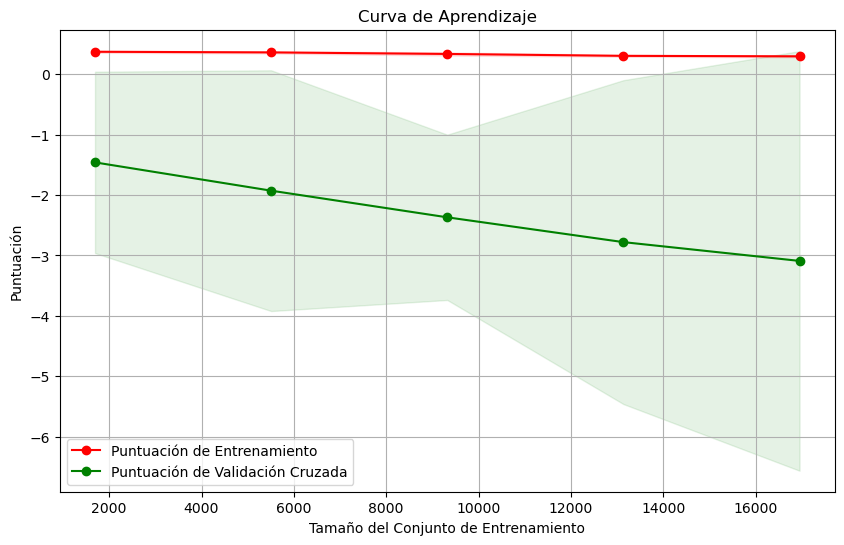

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plotea una curva de aprendizaje para un estimador dado.

    :param estimator: Estimador (clasificador o regresor) que se va a evaluar.
    :param X: Datos de entrenamiento.
    :param y: Etiquetas de entrenamiento.
    :param ylim: Tuple (ymin, ymax) para establecer los límites del eje y.
    :param cv: Estrategia de validación cruzada.
    :param n_jobs: Número de trabajadores para paralelizar el cálculo.
    :param train_sizes: Tamaños de entrenamiento para los cuales se calcula la curva de aprendizaje.
    """
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de Validación Cruzada")

    plt.legend(loc="best")
    return plt

# Uso del código:
# Reemplaza 'modelo' por tu propio modelo, 'X' y 'y' por tus datos y 'cv' por tu estrategia de validación cruzada.
plot_learning_curve(modelo_lineal_multiple, X, y, cv=5, n_jobs=-1)
plt.show()

In [17]:
from sklearn.linear_model import ElasticNet

In [18]:
enet_model = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    enet_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = enet_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MAE para {variable_objetivo}: {mae}')

MAE para BEN: 0.14688424500194908
MAE para CH4: 0.5548241928695755
MAE para CO: 0.08798229608525865
MAE para EBE: 0.36914326289163774
MAE para NMHC: 0.05064316829273859
MAE para NO: 9.220167515978735
MAE para NO2: 10.16924560694022
MAE para NOX: 22.949100352920105
MAE para O3: 10.687449895619546
MAE para PM10: 7.091486862859421
MAE para PM25: 3.5999453815482014
MAE para SO2: 2.302728823553645
MAE para TCH: 0.6020126519306942
MAE para TOL: 0.8376342064905442


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [50]:
modelo_arbol = DecisionTreeRegressor(max_depth=15)  # Puedes ajustar la profundidad máxima según tus necesidades

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_arbol.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_arbol.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.03510897156453033
mae para CH4: 0.09565238189141295
mae para CO: 0.028657823194561137
mae para EBE: 0.09315341245414856
mae para NMHC: 0.010921137190975927
mae para NO: 2.244205145352958
mae para NO2: 3.2737767593319242
mae para NOX: 6.104440635974131
mae para O3: 3.1745555199572193
mae para PM10: 2.46778006480707
mae para PM25: 1.0415080121266314
mae para SO2: 0.9110601484223405
mae para TCH: 0.09883188307916016
mae para TOL: 0.22997807094587316


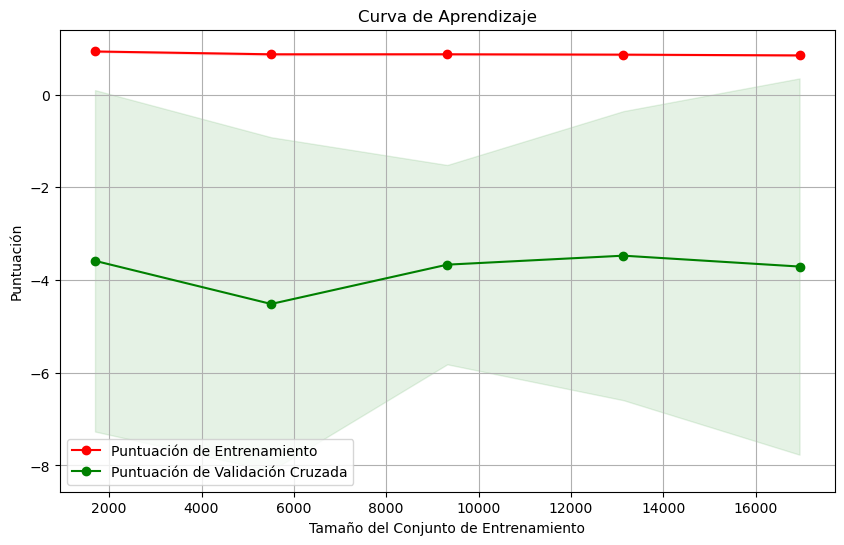

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plotea una curva de aprendizaje para un estimador dado.

    :param estimator: Estimador (clasificador o regresor) que se va a evaluar.
    :param X: Datos de entrenamiento.
    :param y: Etiquetas de entrenamiento.
    :param ylim: Tuple (ymin, ymax) para establecer los límites del eje y.
    :param cv: Estrategia de validación cruzada.
    :param n_jobs: Número de trabajadores para paralelizar el cálculo.
    :param train_sizes: Tamaños de entrenamiento para los cuales se calcula la curva de aprendizaje.
    """
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de Validación Cruzada")

    plt.legend(loc="best")
    return plt

# Uso del código:
# Reemplaza 'modelo' por tu propio modelo, 'X' y 'y' por tus datos y 'cv' por tu estrategia de validación cruzada.
plot_learning_curve(modelo_arbol, X, y, cv=5, n_jobs=-1)
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsRegressor

modelo_knn = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar la profundidad máxima según tus necesidades

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_knn.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_knn.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.07074220040590928
mae para CH4: 0.1322497286071648
mae para CO: 0.051010148855879726
mae para EBE: 0.1768622268372115
mae para NMHC: 0.013470901968188037
mae para NO: 4.963872242984906
mae para NO2: 6.317403811084842
mae para NOX: 13.228763993357846
mae para O3: 5.593811181946701
mae para PM10: 3.1205385377826027
mae para PM25: 1.3535745189660324
mae para SO2: 1.2848427270091498
mae para TCH: 0.1439433142965026
mae para TOL: 0.3934161671465206


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = rf_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.02800181973672084
mae para CH4: 0.047481846819815404
mae para CO: 0.020596322940492323
mae para EBE: 0.06795596050962666
mae para NMHC: 0.0053042246199938425
mae para NO: 1.9872082380078557
mae para NO2: 2.4349870463598697
mae para NOX: 5.1659057285086805
mae para O3: 2.194004819656745
mae para PM10: 1.2573656368348067
mae para PM25: 0.5421607722540253
mae para SO2: 0.5255179210444582
mae para TCH: 0.05230540489226323
mae para TOL: 0.1517384666567025


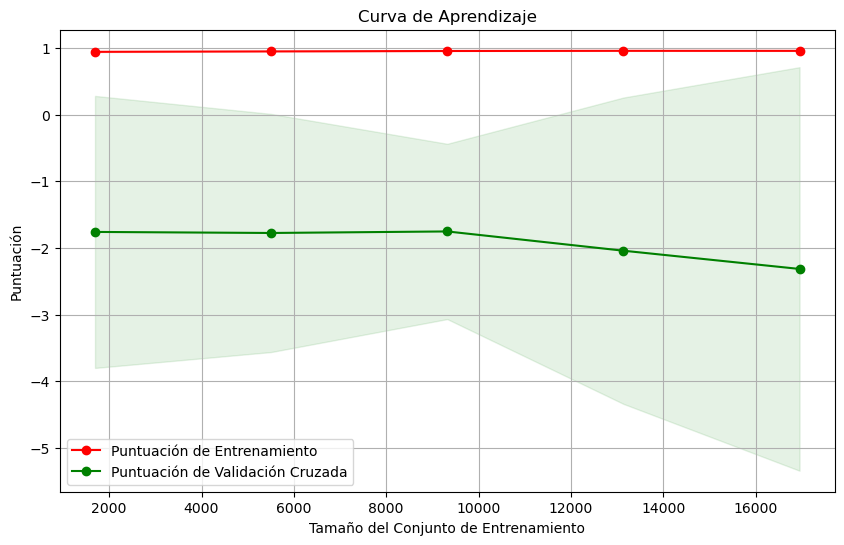

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plotea una curva de aprendizaje para un estimador dado.

    :param estimator: Estimador (clasificador o regresor) que se va a evaluar.
    :param X: Datos de entrenamiento.
    :param y: Etiquetas de entrenamiento.
    :param ylim: Tuple (ymin, ymax) para establecer los límites del eje y.
    :param cv: Estrategia de validación cruzada.
    :param n_jobs: Número de trabajadores para paralelizar el cálculo.
    :param train_sizes: Tamaños de entrenamiento para los cuales se calcula la curva de aprendizaje.
    """
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de Validación Cruzada")

    plt.legend(loc="best")
    return plt

# Uso del código:
# Reemplaza 'modelo' por tu propio modelo, 'X' y 'y' por tus datos y 'cv' por tu estrategia de validación cruzada.
plot_learning_curve(rf_model, X, y, cv=5, n_jobs=-1)
plt.show()

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    gb_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = gb_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.08009914584752853
mae para CH4: 0.28364376361828936
mae para CO: 0.05640021861660899
mae para EBE: 0.2066276563004903
mae para NMHC: 0.029648865091362924
mae para NO: 5.401484860676865
mae para NO2: 6.999373018023077
mae para NOX: 14.683268609911368
mae para O3: 7.2230137543501485
mae para PM10: 4.602403653652865
mae para PM25: 2.1619321887732412
mae para SO2: 1.5321722642092428
mae para TCH: 0.31042069173089054
mae para TOL: 0.5152057245789904


In [58]:
from sklearn.ensemble import BaggingRegressor

In [59]:
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=100, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    bagging_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = bagging_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.027996774686259374
mae para CH4: 0.047451412338428575
mae para CO: 0.020562464725174603
mae para EBE: 0.06779975466012775
mae para NMHC: 0.005318699421478131
mae para NO: 1.9864706071632725
mae para NO2: 2.4351884035317743
mae para NOX: 5.160812958472384
mae para O3: 2.194205013160243
mae para PM10: 1.2573325331646166
mae para PM25: 0.5416108239853579
mae para SO2: 0.5253239993449434
mae para TCH: 0.05235532045144484
mae para TOL: 0.15165507626344696


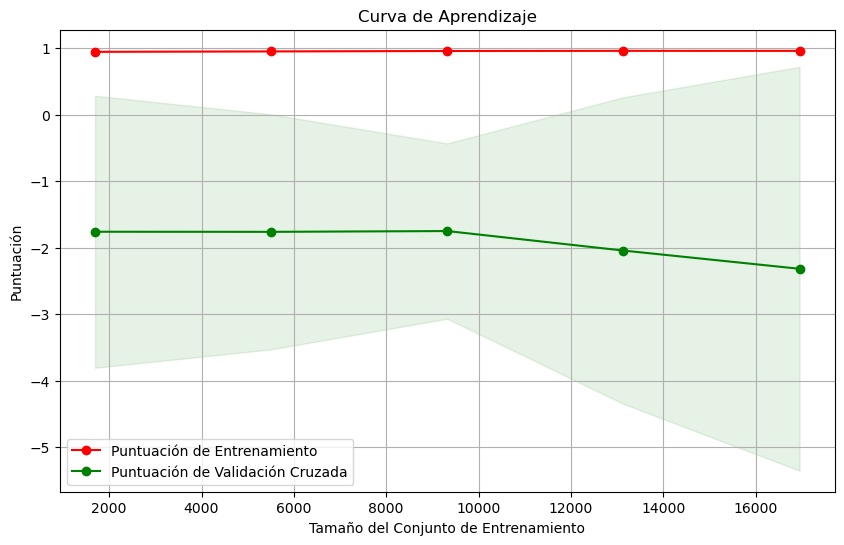

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plotea una curva de aprendizaje para un estimador dado.

    :param estimator: Estimador (clasificador o regresor) que se va a evaluar.
    :param X: Datos de entrenamiento.
    :param y: Etiquetas de entrenamiento.
    :param ylim: Tuple (ymin, ymax) para establecer los límites del eje y.
    :param cv: Estrategia de validación cruzada.
    :param n_jobs: Número de trabajadores para paralelizar el cálculo.
    :param train_sizes: Tamaños de entrenamiento para los cuales se calcula la curva de aprendizaje.
    """
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de Validación Cruzada")

    plt.legend(loc="best")
    return plt

# Uso del código:
# Reemplaza 'modelo' por tu propio modelo, 'X' y 'y' por tus datos y 'cv' por tu estrategia de validación cruzada.
plot_learning_curve(bagging_model, X, y, cv=5, n_jobs=-1)
plt.show()

In [26]:
from sklearn.neural_network import MLPRegressor

In [27]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    mlp_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = mlp_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.19847446146288156
mae para CH4: 0.6055911254388182
mae para CO: 0.2584326616316904
mae para EBE: 0.6159863336288728
mae para NMHC: 0.5255330454658415
mae para NO: 7.12047888612175
mae para NO2: 8.52208285455263
mae para NOX: 18.810459566250596
mae para O3: 8.865735222357053
mae para PM10: 6.300458711893833
mae para PM25: 3.4689336239727084
mae para SO2: 1.964477253111763
mae para TCH: 0.6109210257304349
mae para TOL: 0.9937403305330842


In [28]:
from sklearn.linear_model import Ridge

In [29]:
modelo_ridge = Ridge(alpha=1.0, solver='auto')

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_ridge.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_ridge.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.13374189241601483
mae para CH4: 0.5470024367228762
mae para CO: 0.07453636478105362
mae para EBE: 0.3636569264263092
mae para NMHC: 0.04879532270772268
mae para NO: 9.258716870530865
mae para NO2: 9.764740858771868
mae para NOX: 22.62688383996196
mae para O3: 10.24929096159871
mae para PM10: 7.023308725572433
mae para PM25: 3.528202677586048
mae para SO2: 2.305765048447175
mae para TCH: 0.5941736207023822
mae para TOL: 0.7765612181510733


In [30]:
from sklearn.linear_model import Lasso

In [31]:
modelo_lasso = Lasso(alpha=1.0)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_lasso.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_lasso.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.16479039914379232
mae para CH4: 0.5875405642729614
mae para CO: 0.0894845193503859
mae para EBE: 0.3757864870991415
mae para NMHC: 0.05195637193303362
mae para NO: 9.14250914043836
mae para NO2: 9.859249253759652
mae para NOX: 22.51655162572023
mae para O3: 10.444195589477449
mae para PM10: 7.187311575899643
mae para PM25: 3.747098244673887
mae para SO2: 2.301766044014012
mae para TCH: 0.63380040595343
mae para TOL: 0.8480680411222039


RMSE

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [20]:
modelo_arbol = DecisionTreeRegressor(max_depth=15)  # Puedes ajustar la profundidad máxima según tus necesidades

# Entrenar el modelo para cada variable objetivo
rmse_scores = {}  # Un diccionario para almacenar los resultados RMSE

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_arbol.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_arbol.predict(X)  # Realiza predicciones
    
    # Calcula el Error Cuadrático Medio (RMSE) para la variable objetivo actual
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    rmse_scores[variable_objetivo] = rmse

    # Imprime el resultado RMSE para la variable objetivo actual
    print(f'RMSE para {variable_objetivo}: {rmse}')

RMSE para BEN: 0.0656239949223439
RMSE para CH4: 0.23402984238671787
RMSE para CO: 0.049353434496076654
RMSE para EBE: 0.26822228763300365
RMSE para NMHC: 0.025722098553390485
RMSE para NO: 4.665179806797758
RMSE para NO2: 5.2327040053262
RMSE para NOX: 10.809723983106215
RMSE para O3: 5.328253842841714
RMSE para PM10: 4.352890418742513
RMSE para PM25: 1.8759973855185426
RMSE para SO2: 1.5087407190686783
RMSE para TCH: 0.2487458998016342
RMSE para TOL: 0.4443589477745896


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Supongamos que tienes un modelo de regresión de árbol previamente definido
modelo_arbol = DecisionTreeRegressor(max_depth=15)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(modelo_arbol, X, y, cv=5, scoring='neg_mean_squared_error')

# Convierte los puntajes negativos a RMSE (raíz cuadrada del error cuadrático medio)
rmse_scores = np.sqrt(-puntajes)

# Imprime los puntajes RMSE para cada pliegue
print("Puntajes RMSE para cada pliegue:", rmse_scores)

# Calcula el promedio de los puntajes RMSE
promedio_rmse = np.mean(rmse_scores)
print("RMSE promedio:", promedio_rmse)

Puntajes RMSE para cada pliegue: [17.20084451 15.17907162 11.9321843  11.54012511 13.3759656 ]
RMSE promedio: 13.845638227219553


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

modelo_arbol = DecisionTreeRegressor(max_depth=15)  

puntajes_r2 = cross_val_score(modelo_arbol, X, y, cv=10, scoring='r2')
print("Puntajes R² para cada pliegue:", puntajes_r2)

promedio_r2 = puntajes_r2.mean()
print("R² promedio:", promedio_r2)

Puntajes R² para cada pliegue: [-0.05203765 -1.33538997 -2.17760306 -7.97316672  0.32346291  0.30323305
  0.12496316  0.10844725 -0.50181713 -0.12214378]
R² promedio: -1.1302051944385847


In [26]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
modelo_arbol = DecisionTreeRegressor(max_depth=15)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(modelo_arbol, X, y, cv=10, scoring='neg_mean_absolute_error')

# Convierte los puntajes negativos a MAE (Error Absoluto Medio)
mae_scores = -puntajes

# Imprime los puntajes MAE para cada pliegue
print("Puntajes MAE para cada pliegue:", mae_scores)

# Calcula el promedio de los puntajes MAE
promedio_mae = np.mean(mae_scores)
print("MAE promedio:", promedio_mae)

Puntajes MAE para cada pliegue: [4.1986206  5.20743068 3.92257622 3.7507801  3.37646597 3.30586306
 3.72105199 3.12056728 4.13877562 3.51864082]
MAE promedio: 3.8260772330009543


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = rf_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MAE para {variable_objetivo}: {mae}')

R^2 para BEN: 0.9680080646736083
R^2 para CH4: 0.9801513225401025
R^2 para CO: 0.9368667165940533
R^2 para EBE: 0.9258208337611615
R^2 para NMHC: 0.9703693431955582
R^2 para NO: 0.9595000477779396
R^2 para NO2: 0.9636589710437772
R^2 para NOX: 0.96388590012562
R^2 para O3: 0.9812370131164795
R^2 para PM10: 0.9674231359103795
R^2 para PM25: 0.9709780990609391
R^2 para SO2: 0.9383234568774728
R^2 para TCH: 0.9796494045161149
R^2 para TOL: 0.9536574362447438


In [31]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Imprime los puntajes R² para cada pliegue
print("Puntajes R² para cada pliegue:", puntajes_r2)

# Calcula el promedio de los puntajes R²
promedio_r2 = puntajes_r2.mean()
print("R² promedio:", promedio_r2)

Puntajes R² para cada pliegue: [-5.78656987 -6.22544839  0.44344265  0.31245346 -0.30975705]
R² promedio: -2.3131758396415565


In [43]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=100, random_state=42) # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(bagging_model, X, y, cv=5, scoring='r2')

# Imprime los puntajes MAE para cada pliegue
print("Puntajes R² para cada pliegue:", puntajes_r2)

# Calcula el promedio de los puntajes R²
promedio_r2 = puntajes_r2.mean()
print("R² promedio:", promedio_r2)

Puntajes R² para cada pliegue: [-5.74805886 -6.29298089  0.44402766  0.31358069 -0.31025886]
R² promedio: -2.3187380532620727


In [33]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar la profundidad máxima según tus necesidades

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = rf_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

mae para BEN: 0.02800181973672084
mae para CH4: 0.047481846819815404
mae para CO: 0.020596322940492323
mae para EBE: 0.06795596050962666
mae para NMHC: 0.0053042246199938425
mae para NO: 1.9872082380078557
mae para NO2: 2.4349870463598697
mae para NOX: 5.1659057285086805
mae para O3: 2.194004819656745
mae para PM10: 1.2573656368348067
mae para PM25: 0.5421607722540253
mae para SO2: 0.5255179210444582
mae para TCH: 0.05230540489226323
mae para TOL: 0.1517384666567025


In [34]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Convierte los puntajes negativos a MAE (Error Absoluto Medio)
mae_scores = -puntajes

# Imprime los puntajes MAE para cada pliegue
print("Puntajes MAE para cada pliegue:", mae_scores)

# Calcula el promedio de los puntajes MAE
promedio_mae = np.mean(mae_scores)
print("MAE promedio:", promedio_mae)

Puntajes MAE para cada pliegue: [3.59715979 4.1995842  3.17365316 2.86202667 2.77603076 2.47969499
 3.02367128 2.41773943 3.19132751 2.73299702]
MAE promedio: 3.0453884805737776


In [ ]:
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=100, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    bagging_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = bagging_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = mean_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'mae para {variable_objetivo}: {mae}')

In [41]:
import numpy as np

In [42]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=100, random_state=42) # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(bagging_model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Convierte los puntajes negativos a MAE (Error Absoluto Medio)
mae_scores = -puntajes

# Imprime los puntajes MAE para cada pliegue
print("Puntajes MAE para cada pliegue:", mae_scores)

# Calcula el promedio de los puntajes MAE
promedio_mae = np.mean(mae_scores)
print("MAE promedio:", promedio_mae)

Puntajes MAE para cada pliegue: [3.59545374 4.19840512 3.17477095 2.85688974 2.77635625 2.48088342
 3.02408939 2.41939888 3.19446614 2.73541114]
MAE promedio: 3.045612478185312
